In [110]:
from pulp import LpVariable, LpInteger, LpContinuous, LpProblem, value, LpMinimize, LpStatus

In [111]:
# Define the parameters

total_jobs = 8

In [112]:
# Define the variables

A_1, A_2 = LpVariable('A_1', lowBound=0, cat=LpInteger),LpVariable('A_2', lowBound=0, cat=LpInteger)
B_1, B_2 = LpVariable('B_1', lowBound=0, cat=LpInteger),LpVariable('B_2', lowBound=0, cat=LpInteger)
C_1, C_2 = LpVariable('C_1', lowBound=0, cat=LpInteger),LpVariable('C_2', lowBound=0, cat=LpInteger)

C_Max = LpVariable("C_Max", lowBound=0, cat=LpContinuous)


In [113]:
# Define the problem

prob = LpProblem("Minimize balanced production schedule", LpMinimize)

prob += C_Max, "Minimize makespan"

/Users/max.howard/development/learning/optimization/env/lib/python3.13/site-packages/pulp/pulp.py:1298: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [114]:
# Define the constraints

prob += A_1 + A_2 == total_jobs, "Balance job A"
prob += B_1 + B_2 == total_jobs, "Balance job B"
prob += C_1 + C_2 == total_jobs, "Balance job C"

prob += C_Max >= 2 * A_1 + 1 * B_1 + 2 * C_1, "Makespan machine 1"
prob += C_Max >= 2 * A_2 + 1 * B_2 + 2 * C_2, "Makespan machine 2"



In [115]:
prob.solve()

optimal_a_1 = value(A_1)
optimal_a_2 = value(A_2)
optimal_b_1 = value(B_1)
optimal_b_2 = value(B_2)
optimal_c_1 = value(C_1)
optimal_c_2 = value(C_2)

print ("Problem status", LpStatus[prob.status])
print ("Optimal a_1=", optimal_a_1, " b_1=", optimal_b_1, " c_1=", optimal_c_1)
print ("Optimal a_2=", optimal_a_2, " b_2=", optimal_b_2, " c_2=", optimal_c_2)
print ("Minimized job execution time=", value(prob.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/max.howard/development/learning/optimization/env/lib/python3.13/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4_/zpvbqjvs2f3b5dpcg0lk0tsc0000gn/T/3f06f086ff914467ae46ed362241ba05-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4_/zpvbqjvs2f3b5dpcg0lk0tsc0000gn/T/3f06f086ff914467ae46ed362241ba05-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 38 RHS
At line 44 BOUNDS
At line 51 ENDATA
Problem MODEL has 5 rows, 7 columns and 14 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 2e+09 - 0.00 seconds
Cgl0004I processed model has 2 rows, 3 columns (2 integer (0 of which binary)) and 6 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0012I Integer solution of 2e+09 found by DiveCoefficient after 0 iterations and 0 nodes (

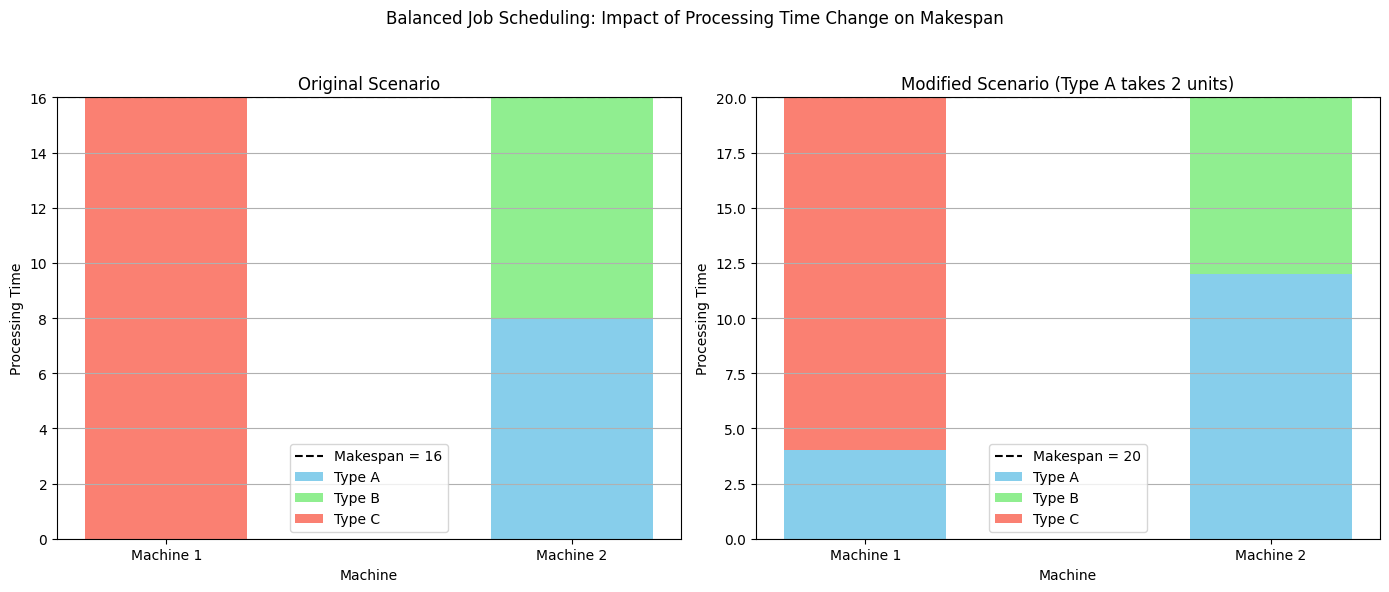

In [116]:
# Visualize the problem

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Data for Original Scenario
# -----------------------------
# Processing times for original scenario:
# Type A: 1 time unit, Type B: 1 time unit, Type C: 2 time units.
# Optimal solution (given): 
#   Machine 1: Type A = 0, Type B = 0, Type C = 8 jobs  -> Processing time = 0*1 + 0*1 + 8*2 = 16
#   Machine 2: Type A = 8, Type B = 8, Type C = 0 jobs  -> Processing time = 8*1 + 8*1 + 0*2 = 16
machines_orig = {
    "Machine 1": {"A": 0, "B": 0, "C": 8},
    "Machine 2": {"A": 8, "B": 8, "C": 0}
}
# Calculate processing times for each machine
T1_orig = machines_orig["Machine 1"]["A"]*1 + machines_orig["Machine 1"]["B"]*1 + machines_orig["Machine 1"]["C"]*2
T2_orig = machines_orig["Machine 2"]["A"]*1 + machines_orig["Machine 2"]["B"]*1 + machines_orig["Machine 2"]["C"]*2
makespan_orig = max(T1_orig, T2_orig)

# -----------------------------
# Data for Modified Scenario
# -----------------------------
# In the modified scenario, processing time for type A becomes 2 time units.
# Optimal solution (given): 
#   Machine 1: Type A = 2, Type B = 0, Type C = 8 jobs -> Processing time = 2*2 + 0*1 + 8*2 = 4 + 16 = 20
#   Machine 2: Type A = 6, Type B = 8, Type C = 0 jobs -> Processing time = 6*2 + 8*1 + 0*2 = 12 + 8 = 20
machines_mod = {
    "Machine 1": {"A": 2, "B": 0, "C": 8},
    "Machine 2": {"A": 6, "B": 8, "C": 0}
}
T1_mod = machines_mod["Machine 1"]["A"]*2 + machines_mod["Machine 1"]["B"]*1 + machines_mod["Machine 1"]["C"]*2
T2_mod = machines_mod["Machine 2"]["A"]*2 + machines_mod["Machine 2"]["B"]*1 + machines_mod["Machine 2"]["C"]*2
makespan_mod = max(T1_mod, T2_mod)

# -----------------------------
# Plotting
# -----------------------------
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
bar_width = 0.4
machines = ["Machine 1", "Machine 2"]
job_types = ["A", "B", "C"]

# Colors for each job type
colors = {"A": "skyblue", "B": "lightgreen", "C": "salmon"}

# Function to compute stacked bar heights given machine data and processing times for each type
def get_bar_heights(machine_data, proc_times):
    heights = []
    for jt in job_types:
        heights.append(machine_data[jt] * proc_times[jt])
    return heights

# Processing times for each job type in original scenario:
proc_orig = {"A": 1, "B": 1, "C": 2}
# Processing times for modified scenario:
proc_mod = {"A": 2, "B": 1, "C": 2}

# Prepare data for original scenario
heights_orig = []
for m in machines:
    heights_orig.append(get_bar_heights(machines_orig[m], proc_orig))
heights_orig = np.array(heights_orig)

# Prepare data for modified scenario
heights_mod = []
for m in machines:
    heights_mod.append(get_bar_heights(machines_mod[m], proc_mod))
heights_mod = np.array(heights_mod)

# Plot Original Scenario
ax = axs[0]
ax.set_title("Original Scenario")
ax.set_ylabel("Processing Time")
ax.set_xlabel("Machine")
ax.set_xticks(np.arange(len(machines)))
ax.set_xticklabels(machines)
# For each job type, create a stacked bar
bottom = np.zeros(len(machines))
for jt in job_types:
    values = [d for d in heights_orig[:, job_types.index(jt)]]
    ax.bar(np.arange(len(machines)), values, bar_width, bottom=bottom, color=colors[jt], label=f"Type {jt}")
    bottom += values
# Annotate makespan
ax.axhline(makespan_orig, color='k', linestyle='--', label=f"Makespan = {makespan_orig}")
ax.legend()
ax.grid(True, axis="y")

# Plot Modified Scenario
ax2 = axs[1]
ax2.set_title("Modified Scenario (Type A takes 2 units)")
ax2.set_ylabel("Processing Time")
ax2.set_xlabel("Machine")
ax2.set_xticks(np.arange(len(machines)))
ax2.set_xticklabels(machines)
bottom = np.zeros(len(machines))
for jt in job_types:
    values = [d for d in heights_mod[:, job_types.index(jt)]]
    ax2.bar(np.arange(len(machines)), values, bar_width, bottom=bottom, color=colors[jt], label=f"Type {jt}")
    bottom += values
ax2.axhline(makespan_mod, color='k', linestyle='--', label=f"Makespan = {makespan_mod}")
ax2.legend()
ax2.grid(True, axis="y")

plt.suptitle("Balanced Job Scheduling: Impact of Processing Time Change on Makespan")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
